In [1]:
%matplotlib inline
from matplotlib import pyplot as plt


In [2]:
from keras.preprocessing.image import load_img

Using TensorFlow backend.


In [20]:
import os
import numpy as np

In [13]:
%env DATA /mnt/data

env: DATA=/mnt/data


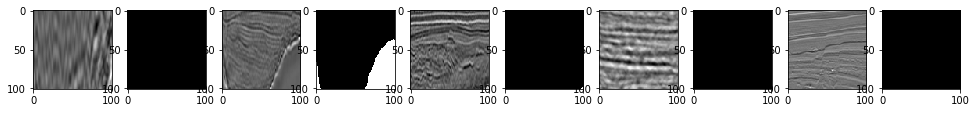

In [14]:
ids= ['1f1cc6b3a4','5b7c160d0d','6c40978ddf','7dfdf6eeb8','7e5a6e5013']
plt.figure(figsize=(20,10))
for j, img_name in enumerate(ids):
    q = j+1
    img = load_img(os.path.join(os.getenv('DATA'), 'train', 'images', img_name+'.png'))
    img_mask = load_img(os.path.join(os.getenv('DATA'), 'train', 'masks', img_name+'.png'))
    
    plt.subplot(1,2*(1+len(ids)),q*2-1)
    plt.imshow(img)
    plt.subplot(1,2*(1+len(ids)),q*2)
    plt.imshow(img_mask)
plt.show()

In [8]:
!ls /mnt/data

depths.csv  sample_submission.csv  test  test.zip  train  train.csv  train.zip


In [16]:
path_train=os.path.join(os.getenv('DATA'), 'train')
path_test=os.path.join(os.getenv('DATA'), 'test')

In [18]:
train_ids = next(os.walk(os.path.join(path_train,"images")))[2]
test_ids = next(os.walk(os.path.join(path_test,"images")))[2]

In [21]:
# Get and resize train images and masks
X_train = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm_notebook(enumerate(train_ids), total=len(train_ids)):
    path = path_train
    img = load_img(path + '/images/' + id_)
    x = img_to_array(img)[:,:,1]
    x = resize(x, (128, 128, 1), mode='constant', preserve_range=True)
    X_train[n] = x
    mask = img_to_array(load_img(path + '/masks/' + id_))[:,:,1]
    Y_train[n] = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)

print('Done!')

NameError: name 'im_height' is not defined